In [42]:
#import necessary libs
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from plotnine import *

from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

In [78]:
DF = pd.read_csv('Data.csv')

In [84]:
DF['Gender.Binary'] = np.where(DF['Gender'] == 'Male', 1, 0)

In [85]:
DF.head()

,Unnamed: 0,Gender,Height,Weight,Gender.Binary
0,1,Male,73.847017,241.893563,1
1,2,Male,68.781904,162.310473,1
2,3,Male,74.110105,212.740856,1
3,4,Male,71.730978,220.042470,1
4,5,Male,69.881796,206.349801,1


In [86]:
DF_cluster = DF[['Height', 'Weight']]

In [87]:
DF_cluster.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [88]:
#TSNE
mms = MinMaxScaler();

In [89]:
normed = mms.fit_transform(DF_cluster)

In [90]:
projection = TSNE(n_components=2).fit_transform(normed);

In [93]:
lowd = pd.DataFrame(projection, columns=["X1","X2"])

In [94]:
lowd["cluster"] = DF["Gender.Binary"];

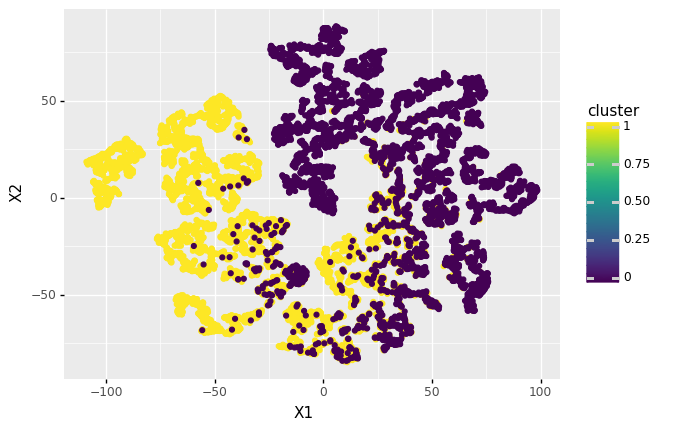

<ggplot: (8726485673162)>

In [95]:
(ggplot(lowd,aes("X1","X2")) + geom_point(aes(color="cluster")))